In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')

from austen import Logger
from pathlib import Path
import joblib
import networkx as nx
import matplotlib.pyplot as plt

from bike.model.graph import Graph
from bike.util.analysis import run_analysis

In [2]:
VERTICES_PATH = Path('../data/vertices.csv')
EDGES_PATH = Path('../data/edges.csv')

logger = Logger(Path('log/preprocessing'))


graph_obj = Graph(VERTICES_PATH, EDGES_PATH)
graph = graph_obj.nx_graph
smoothed_graph = joblib.load('./log/preprocessing/preprocessed.nx.joblib')

### degree median ###
Wynik : 3.0
Czas obliczeń : 0.0

Błąd podczas liczenia betweenness centrality median:  

Błąd podczas liczenia closeness centrality median:  

### clustering coefficient ###
Wynik : 0.009
Czas obliczeń : 0.03197360038757324

Błąd podczas liczenia shortest path mean: Graph is not connected.

Błąd podczas liczenia shortest path mean:  local variable 'res' referenced before assignment

### pagerank median ###
Wynik : 0.00010070579196151769
Czas obliczeń : 4.2097063064575195

Błąd podczas liczenia diameter:  Found infinite path length because the graph is not connected

Błąd podczas liczenia diameter:  local variable 'res' referenced before assignment

### number of connected components ###
Wynik : 83
Czas obliczeń : 0.0

### density ###
Wynik : 0.00025029881680840215
Czas obliczeń : 0.017012357711791992



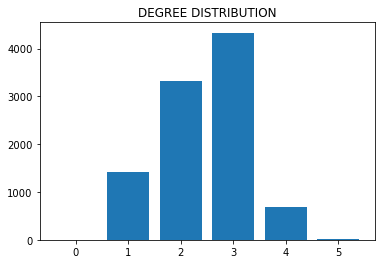

None

Czas:  0.016932010650634766



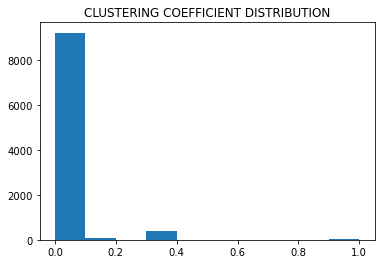

None

Czas:  0.3575475215911865



In [3]:
run_analysis(graph, True)

### degree median ###
Wynik : 3.0
Czas obliczeń : 0.0

Błąd podczas liczenia betweenness centrality median:  

Błąd podczas liczenia closeness centrality median:  

### clustering coefficient ###
Wynik : 0.036
Czas obliczeń : 0.017040491104125977

Błąd podczas liczenia shortest path mean:  Graph is not connected.

Błąd podczas liczenia shortest path mean:  local variable 'res' referenced before assignment

### pagerank median ###
Wynik : 0.00015330002442110022
Czas obliczeń : 5.774465560913086

Błąd podczas liczenia diameter:  Found infinite path length because the graph is not connected

Błąd podczas liczenia diameter:  local variable 'res' referenced before assignment

### number of connected components ###
Wynik : 83
Czas obliczeń : 0.0

### density ###
Wynik : 0.0004109786471801078
Czas obliczeń : 0.001972198486328125



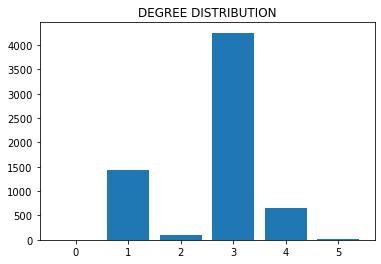

None

Czas:  0.003990650177001953



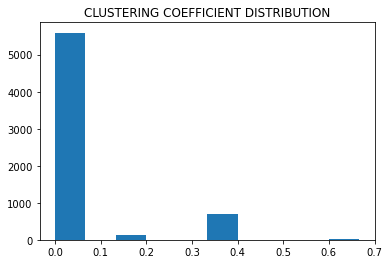

None

Czas:  0.37911272048950195



In [4]:
run_analysis(smoothed_graph, True)

In [5]:
pos = {int(id): (v.x, v.y) for id, v in graph_obj.vertices_by_id.items()}

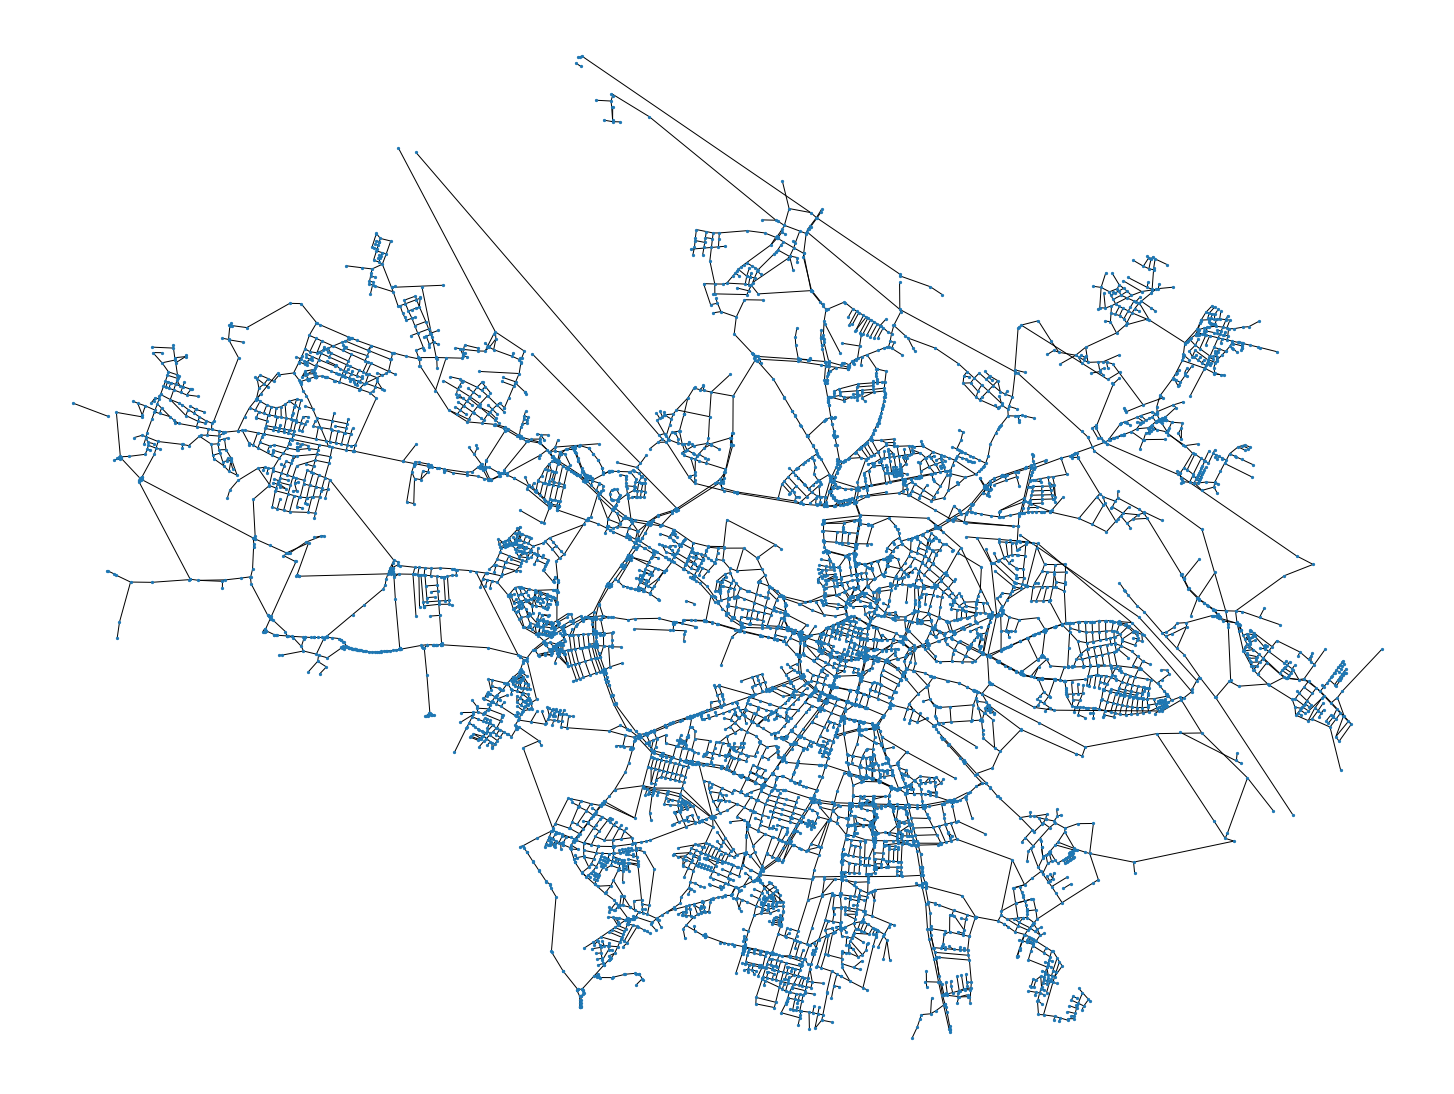

In [6]:
plt.figure(figsize=(20,15))
nx.draw(graph, pos, node_size=5, width=1)
plt.savefig('graph.png', dpi=600)

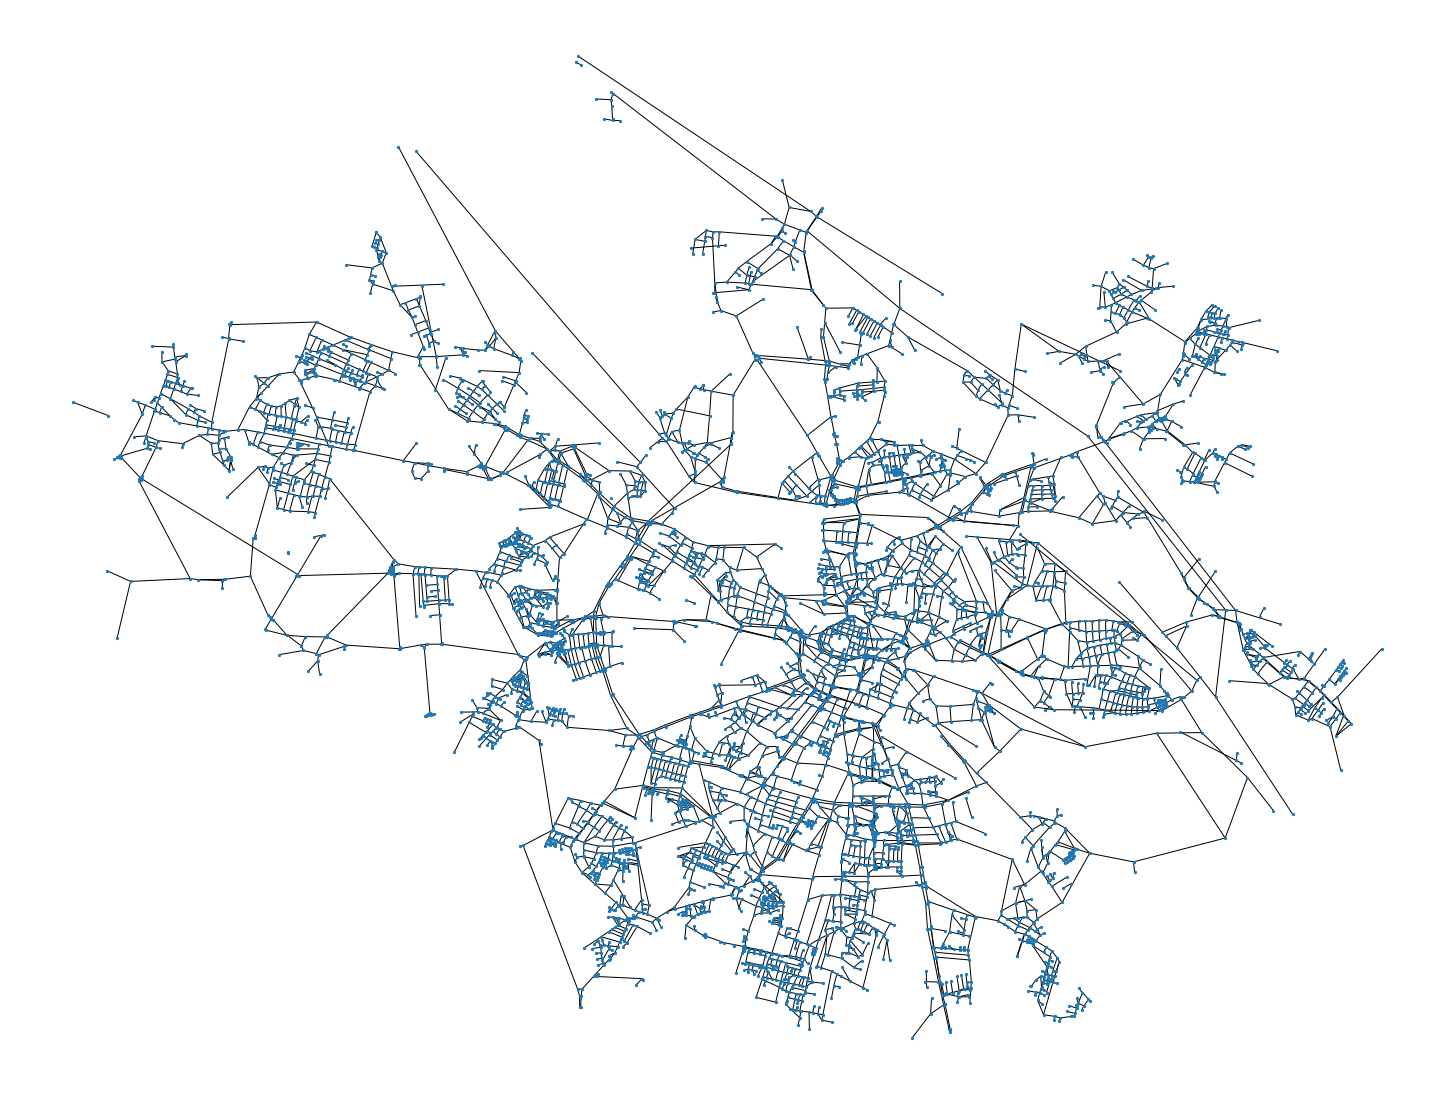

In [7]:
plt.figure(figsize=(20,15))
nx.draw(smoothed_graph, pos, node_size=5, width=1)
plt.savefig('smoothed_graph.png', dpi=600)

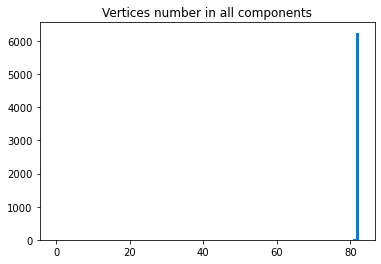

In [8]:
components = nx.algorithms.components.connected_components(smoothed_graph)
components_len = list(map(lambda x: len(x), components))
components_len.sort()

plt.bar(range(len(components_len)), components_len)
plt.title('Vertices number in all components')
plt.show()

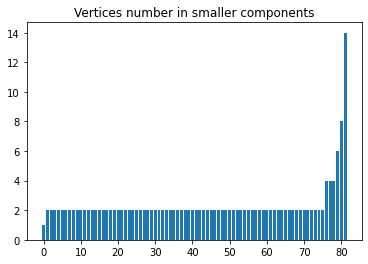

In [9]:
plt.bar(range(len(components_len)-1), components_len[0:-1])
plt.title('Vertices number in smaller components')
plt.show()

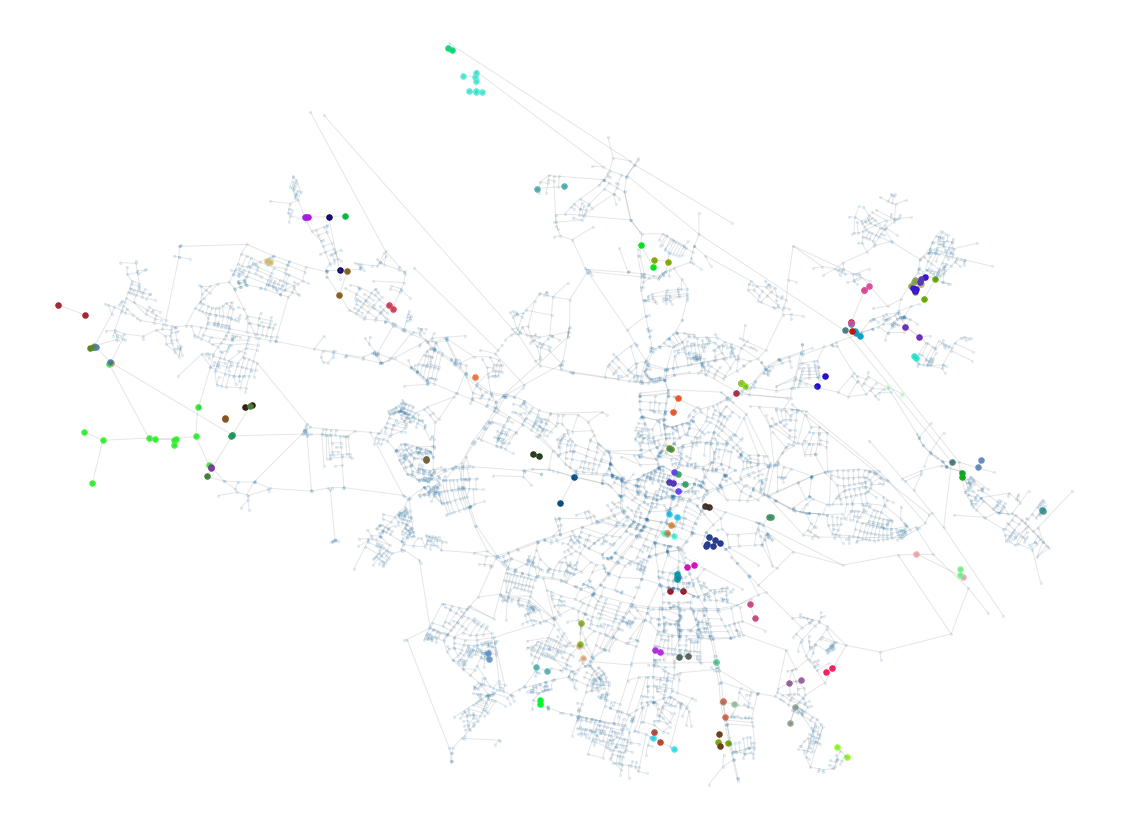

In [10]:
import random
 
from random import randint
color = []
n = 85
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

wcc = nx.algorithms.components.connected_components(smoothed_graph)
plt.figure(figsize=(20,15))
for index, sg in enumerate(wcc):
    if len(sg)<100:
        nx.draw_networkx_nodes(smoothed_graph, pos=pos, nodelist=sg, node_color=[color[index]], node_size=30)
nx.draw(smoothed_graph, pos, node_size=5, width=1, alpha=0.1)
plt.savefig('smoothed_graph_components.png', dpi=600)
plt.show()